In [1]:
%matplotlib inline

# General packages for system, time, etc
import os, time, csv, sys
import datetime
from datetime import date
import glob

# scitnific computing and plotting
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# HDDM related packages
import pymc as pm
import hddm
import kabuki
import arviz as az

# parallel processing related
from p_tqdm import p_map
from functools import partial

#from HDDMarviz import HDDMarviz
#from InferenceDataFromHDDM import InferenceDataFromHDDM
#from plot_ppc_by_cond import plot_ppc_by_cond

/opt/conda/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "


In [2]:
data = pd.read_csv('/home/jovyan/hddm_data.csv')
data = hddm.utils.flip_errors(data)

In [3]:
def ms5(id, data=None, samples=None, burn=None, save_name="a_model"): 
    """This function instantiate model object passing it our data and tailoring an 
        individual hierarchical DDM around our dataset.It finds a good starting point
        which helps with the convergence.""" 
    
    print('running model%i'%id);
    
    import hddm
    
    dbname = save_name + '_chain_%i.db'%id 
    mname  = save_name + '_chain_%i'%id
    m =  hddm.HDDM(data, depends_on={'a': 'Condition'})
    m.find_starting_values()
    m.sample(samples, burn=burn, dbname=dbname, db='pickle') # it's neccessary to save the model data
    m.save(mname)
    
    return m

In [4]:
#pmap is to run multiple chains at once 
samples = 5000  # Cavanagh used 30,000 and 10, 000 burn.
burn = 1500    
thin = 1
chains = 2

model_5 = p_map(partial(ms5, data=data, samples=samples, burn=burn),
                 range(chains))

  0%|          | 0/2 [00:00<?, ?it/s]

running model0
running model1


/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [                  0%                  ] 2 of 5000 complete in 12.2 sec[                  0%                  ] 2 of 5000 complete in 14.2 sec[                  0%                  ] 3 of 5000 complete in 28.3 sec[                  0%                  ] 3 of 5000 complete in 27.5 sec[                  0%                  ] 4 of 5000 complete in 42.9 sec[                  0%                  ] 4 of 5000 complete in 44.2 sec[                  0%                  ] 5 of 5000 complete in 57.1 sec[                  0%                  ] 5 of 5000 complete in 59.1 sec[                  0%                  ] 6 of 5000 complete in 80.0 sec[                  0%                  ] 6 of 5000 complete in 82.5 sec[                  0%                  ] 7 of 5000 complete in 102.0 sec[                  0%                  ] 7 of 5000 complete in 103.9 sec[                  0%                  ] 8 of 5000 complete in 119.0 sec[                  0%                  ] 8 of 5000 complete in 118.1 sec[

In [6]:
stats = model_5[1].gen_stats()
stats

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a(happy),2.32938,0.112913,2.107816,2.251765,2.32971,2.403217,2.559948,0.002127
a(neutral),2.257684,0.112343,2.03775,2.183791,2.256335,2.334277,2.480772,0.001916
a(sad),2.374095,0.131498,2.116894,2.286807,2.370164,2.460647,2.639091,0.002413
a_std,0.665982,0.058106,0.564139,0.625302,0.662129,0.700524,0.794844,0.001213
a_subj(happy).202,3.232796,0.156827,2.927219,3.126356,3.229379,3.336082,3.553065,0.003535
...,...,...,...,...,...,...,...,...
t_subj.276,1.372897,0.194912,0.854297,1.280077,1.401428,1.502416,1.674375,0.005463
t_subj.277,0.429911,0.026203,0.372838,0.413947,0.431793,0.448065,0.476245,0.000587
t_subj.278,0.703228,0.03091,0.636471,0.684698,0.705504,0.724303,0.756369,0.000867
t_subj.279,1.030521,0.034712,0.956379,1.008685,1.033116,1.055229,1.090367,0.000794


In [7]:
display(stats.loc[['v']])
display(stats.loc[['v_std']])
display(stats.loc[['t']])
display(stats.loc[['t_std']])


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v,-0.005375,0.013005,-0.031884,-0.013793,-0.005097,0.003353,0.018908,0.000407


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v_std,0.080336,0.014764,0.051638,0.070641,0.079863,0.089794,0.110471,0.000759


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
t,0.709973,0.035652,0.645112,0.685276,0.708253,0.73281,0.784077,0.0008


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
t_std,0.332573,0.030954,0.279816,0.310826,0.330133,0.35199,0.401564,0.00076


Plotting a(happy)
Plotting a(neutral)
Plotting a(sad)
Plotting v
Plotting t


Text(0.0, 1.0, 'Posterior of HDDM Parameters')

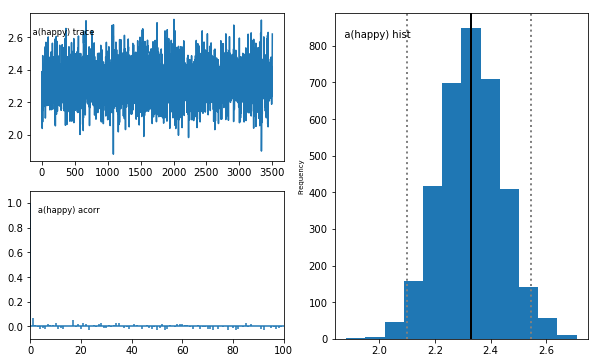

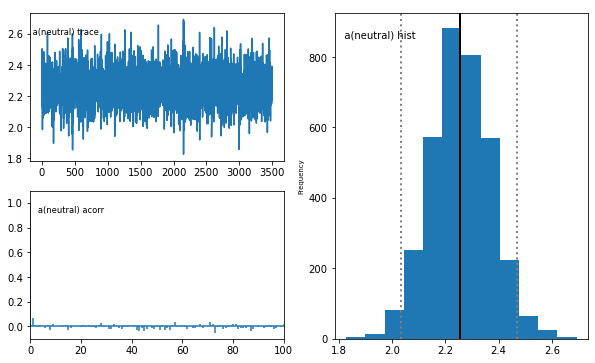

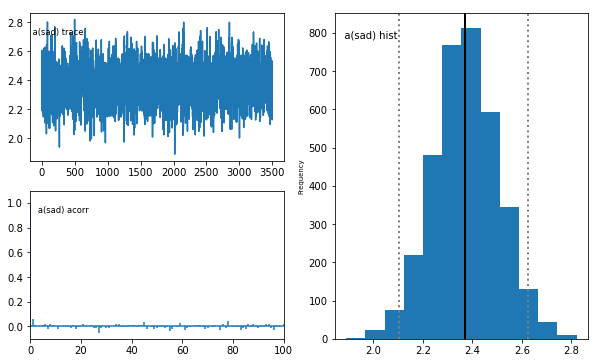

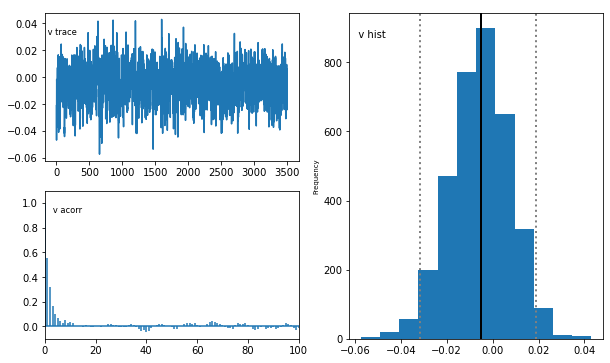

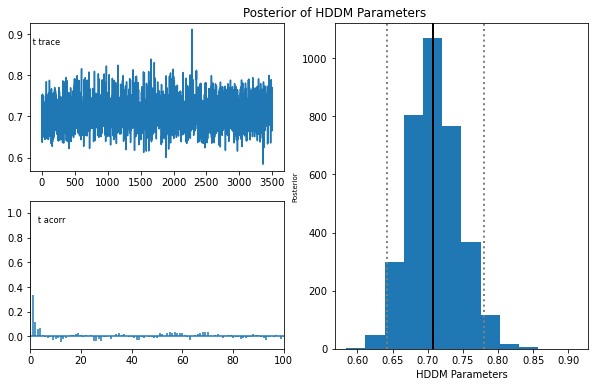

In [9]:
model_5[1].plot_posteriors(['a', 't', 'v'])

plt.xlabel('HDDM Parameters')
plt.ylabel('Posterior')
plt.title('Posterior of HDDM Parameters')

Text(0.5, 1.0, 'Posterior Predictive Plot')

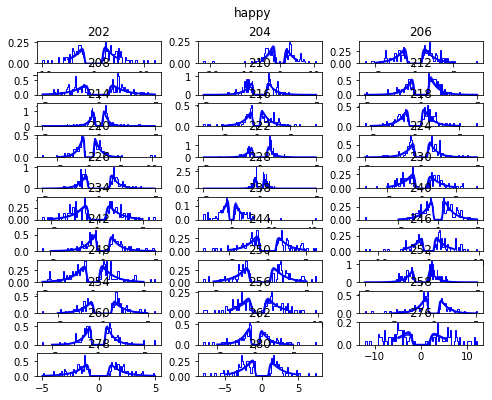

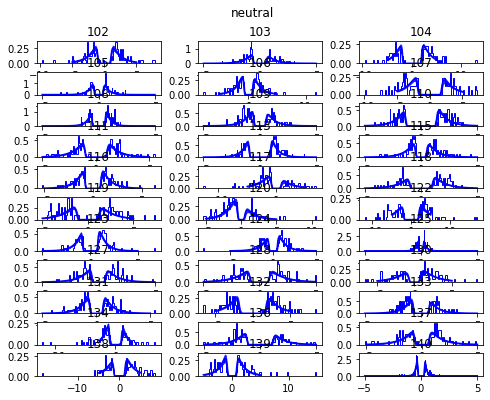

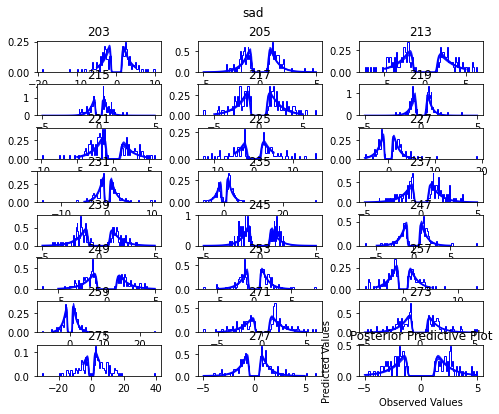

In [10]:
model_5[1].plot_posterior_predictive()

plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Posterior Predictive Plot')

In [12]:
hddm.analyze.gelman_rubin(model_5)

{'a(happy)': 1.0013579693817376,
 'a(neutral)': 1.000411639552772,
 'a(sad)': 0.9999450202348956,
 'a_std': 1.0014927877639928,
 'a_subj(happy).202': 1.0013245315887302,
 'a_subj(happy).204': 1.0022747454548198,
 'a_subj(happy).206': 0.9998592896931133,
 'a_subj(happy).208': 0.9998579583292279,
 'a_subj(happy).210': 1.0003511773898064,
 'a_subj(happy).212': 0.9999110110573588,
 'a_subj(happy).214': 0.9999658976933246,
 'a_subj(happy).216': 1.0010142034026652,
 'a_subj(happy).218': 1.000110849684256,
 'a_subj(happy).220': 0.9998864085678713,
 'a_subj(happy).222': 0.9999247169858664,
 'a_subj(happy).224': 0.9999018343232168,
 'a_subj(happy).226': 0.999942819497892,
 'a_subj(happy).228': 1.0018110140253595,
 'a_subj(happy).230': 0.9999093574124144,
 'a_subj(happy).234': 1.001022682306287,
 'a_subj(happy).238': 0.9998976755720652,
 'a_subj(happy).240': 1.0001033585628187,
 'a_subj(happy).242': 1.0001840818417682,
 'a_subj(happy).244': 1.0014486444306852,
 'a_subj(happy).246': 1.00029539238

Text(0.5, 1.0, 'Combined Posterior Predictive Plot')

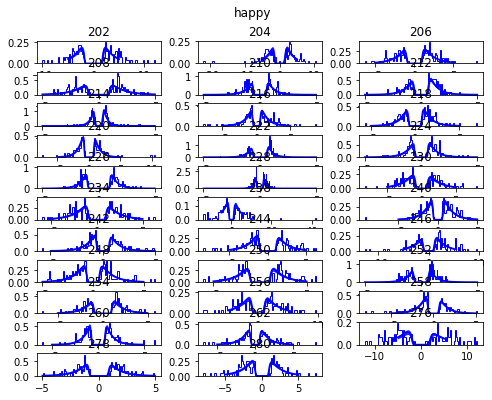

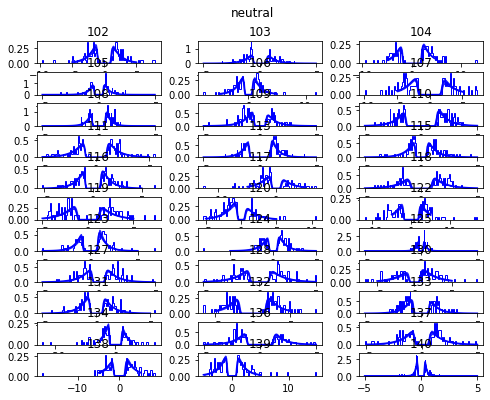

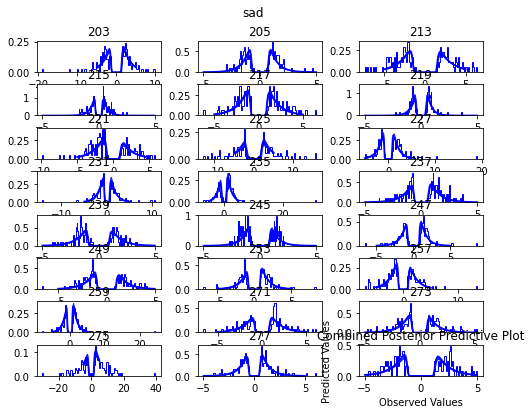

In [13]:
m_comb = kabuki.utils.concat_models(model_5) # combine four chains together
m_comb.plot_posterior_predictive()

plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Combined Posterior Predictive Plot')

In [14]:
print("Simple model DIC: %f" % model_5[0].dic)

Simple model DIC: 38662.219760


In [15]:
print("Simple model DIC: %f" % model_5[1].dic)

Simple model DIC: 38661.521661


Text(0.5, 1.0, 'Posterior of drift-rate group means')

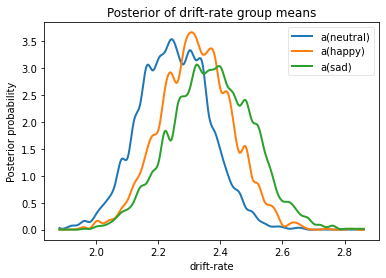

In [21]:
#how does it know which is which?
v_happy, v_sad, v_neutral = model_5[0].nodes_db.node[['a(happy)', 'a(sad)', 'a(neutral)']]
hddm.analyze.plot_posterior_nodes([ v_neutral,v_happy, v_sad])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

In [17]:
#check if drift rate for happy/sad are larger than neutral - bayeasian t-test
print("P(Happy > Neutral) = ", (v_happy.trace() > v_neutral.trace()).mean())
print("P(Sad > Neutral) = ", (v_sad.trace() > v_neutral.trace()).mean())

P(Happy > Neutral) =  0.666
P(Sad > Neutral) =  0.7662857142857142


Text(0.5, 1.0, 'Posterior of decision boundary group means')

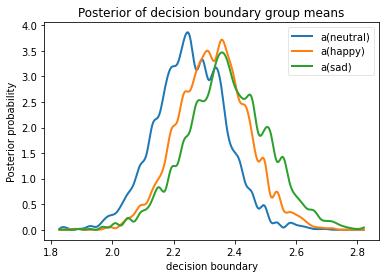

In [23]:
v_happy, v_sad, v_neutral = model_5[1].nodes_db.node[['a(happy)', 'a(sad)', 'a(neutral)']]
hddm.analyze.plot_posterior_nodes([ v_neutral,v_happy, v_sad])
plt.xlabel('decision boundary')
plt.ylabel('Posterior probability')
plt.title('Posterior of decision boundary group means')

In [19]:
#check if drift rate for happy/sad are larger than neutral - bayeasian t-test
print("P(Happy > Neutral) = ", (v_happy.trace() > v_neutral.trace()).mean())
print("P(Sad > Neutral) = ", (v_sad.trace() > v_neutral.trace()).mean())

P(Happy > Neutral) =  0.6797142857142857
P(Sad > Neutral) =  0.76
